In [ ]:
"""
Import Libraries
-----------------------
Purpose: Load all Python libraries needed for data analysis and visualization
"""

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime

# For better looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
sns.set_style("whitegrid")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

Libraries imported successfully!
Pandas version: 2.3.2
Matplotlib version: 3.10.6


In [46]:
"""
Load Data
----------------
Purpose: Load bank transaction dataset
Your columns: date, description, debit, credit, balance, isSuspicious
"""

# Load your CSV file - UPDATE THE FILENAME TO MATCH YOURS
df = pd.read_csv('transactions_Dataset.csv')  # Change this to your filename

print(" Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of transactions: {len(df):,}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"\nFirst 5 rows:")
df.head()

 Data loaded successfully!
Dataset shape: (33611, 6)
Number of transactions: 33,611
Date range: 01-01-2023 to 31-12-2024

First 5 rows:


,date,description,debit,credit,balance,isSuspicious
0,13-03-2023,NETTXN:EBAY,0.00,928023.85,9163047.96,1
1,26-05-2024,PCA:5001234567:1234567891234:LOCALSHOP,719687.04,0.00,208410.89,0
2,01-05-2024,NETTXN:TICKETBOOKINGAIRINDIA,0.00,37460.59,1163580.15,0
3,22-04-2024,IMPS/NA/XXX5678/RRN:876543210987/MOBTXN,758688.30,0.00,1600684.22,0
4,26-04-2023,NETTXN:DARVEYS,25546.10,0.00,27162.22,0


In [47]:
print("DATASET INFORMATION:")
print("=" * 50)
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Column names: {list(df.columns)}")
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMISSING VALUES:")
print("=" * 50)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found!")

# Statistical summary of numeric columns
print("\nSTATISTICAL SUMMARY:")
print("=" * 50)
df[['debit', 'credit', 'balance']].describe()

DATASET INFORMATION:
Total rows: 33611
Total columns: 6
Column names: ['date', 'description', 'debit', 'credit', 'balance', 'isSuspicious']

Data types:
date             object
description      object
debit           float64
credit          float64
balance         float64
isSuspicious      int64
dtype: object

MISSING VALUES:
No missing values found!

STATISTICAL SUMMARY:


,debit,credit,balance
count,3.361100e+04,3.361100e+04,3.361100e+04
mean,2.123229e+05,2.390796e+05,3.968087e+06
std,3.128204e+05,3.318022e+05,3.414025e+06
min,0.000000e+00,0.000000e+00,-7.200712e+05
25%,0.000000e+00,0.000000e+00,1.431312e+06
50%,1.668111e+04,0.000000e+00,3.017288e+06
75%,3.865009e+05,4.711309e+05,5.528246e+06
max,1.793799e+06,1.993110e+06,2.221834e+07


In [48]:
"""
Explore the Dataset Structure
-----------------------------------
Purpose: Understand your data columns and what they contain
"""

# Display basic info
print("DATASET INFORMATION:")
print("=" * 50)
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Column names: {list(df.columns)}")
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMISSING VALUES:")
print("=" * 50)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found!")

# Statistical summary of numeric columns
print("\nSTATISTICAL SUMMARY:")
print("=" * 50)
df[['debit', 'credit', 'balance']].describe()

DATASET INFORMATION:
Total rows: 33611
Total columns: 6
Column names: ['date', 'description', 'debit', 'credit', 'balance', 'isSuspicious']

Data types:
date             object
description      object
debit           float64
credit          float64
balance         float64
isSuspicious      int64
dtype: object

MISSING VALUES:
No missing values found!

STATISTICAL SUMMARY:


,debit,credit,balance
count,3.361100e+04,3.361100e+04,3.361100e+04
mean,2.123229e+05,2.390796e+05,3.968087e+06
std,3.128204e+05,3.318022e+05,3.414025e+06
min,0.000000e+00,0.000000e+00,-7.200712e+05
25%,0.000000e+00,0.000000e+00,1.431312e+06
50%,1.668111e+04,0.000000e+00,3.017288e+06
75%,3.865009e+05,4.711309e+05,5.528246e+06
max,1.793799e+06,1.993110e+06,2.221834e+07


In [49]:
"""
Clean and Prepare Data
----------------------------
Purpose: Transform raw data into analysis-ready format
"""

# Create a cleaned copy
df_clean = df.copy()

# 1. Convert date to datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])

# 2. Fill missing values (if any)
df_clean['description'] = df_clean['description'].fillna('Unknown Transaction')
df_clean['debit'] = df_clean['debit'].fillna(0)
df_clean['credit'] = df_clean['credit'].fillna(0)
df_clean['balance'] = df_clean['balance'].fillna(method='ffill')  # Forward fill balance

# 3. Create transaction amount column (positive for income, negative for expense)
# debit = money leaving (expense), credit = money coming in (income)
df_clean['amount'] = df_clean['credit'] - df_clean['debit']

# 4. Create transaction type column
df_clean['transaction_type'] = df_clean['amount'].apply(
    lambda x: 'Income' if x > 0 else ('Expense' if x < 0 else 'Zero')
)

# 5. Create absolute amount for expense analysis
df_clean['abs_amount'] = abs(df_clean['amount'])

# 6. Extract date features for time-based analysis
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['month_name'] = df_clean['date'].dt.month_name()
df_clean['day'] = df_clean['date'].dt.day
df_clean['day_of_week'] = df_clean['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df_clean['day_name'] = df_clean['date'].dt.day_name()
df_clean['week'] = df_clean['date'].dt.isocalendar().week
df_clean['is_weekend'] = df_clean['day_of_week'].isin([5, 6])  # Saturday and Sunday

# 7. Sort by date
df_clean = df_clean.sort_values('date').reset_index(drop=True)

# 8. Handle isSuspicious column (convert to boolean if needed)
if 'isSuspicious' in df_clean.columns:
    df_clean['isSuspicious'] = df_clean['isSuspicious'].astype(bool)

print("Data cleaning complete!")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Date range: {df_clean['date'].min().date()} to {df_clean['date'].max().date()}")
print(f"Income transactions: {len(df_clean[df_clean['transaction_type'] == 'Income']):,}")
print(f"Expense transactions: {len(df_clean[df_clean['transaction_type'] == 'Expense']):,}")
print(f"Zero transactions: {len(df_clean[df_clean['transaction_type'] == 'Zero']):,}")

Data cleaning complete!
Cleaned dataset shape: (33611, 17)
Date range: 2022-12-16 to 2025-01-12
Income transactions: 15,085
Expense transactions: 18,526
Zero transactions: 0


C:\Users\mhuza\AppData\Local\Temp\ipykernel_6124\2469619842.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_clean['date'] = pd.to_datetime(df_clean['date'])
C:\Users\mhuza\AppData\Local\Temp\ipykernel_6124\2469619842.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['balance'] = df_clean['balance'].fillna(method='ffill')  # Forward fill balance


In [50]:
"""
Categorize Transactions
----------------------------
Purpose: Group similar transactions into meaningful categories based on description
"""

# Create a function to categorize based on description keywords
def categorize_transaction(description):
    """
    Categorize transactions based on keywords in description
    """
    description = str(description).lower()
    
    # Housing
    if any(word in description for word in ['rent', 'mortgage', 'apartment', 'housing', 'lease']):
        return 'Housing'
    
    # Utilities
    elif any(word in description for word in ['electric', 'water', 'gas bill', 'utility', 'internet', 
                                              'wifi', 'phone bill', 'spectrum', 'comcast', 'verizon', 'att']):
        return 'Utilities'
    
    # Groceries
    elif any(word in description for word in ['grocery', 'supermarket', 'walmart', 'target', 'kroger', 
                                              'whole foods', 'trader', 'food lion', 'publix', 'safeway', 'aldi']):
        return 'Groceries'
    
    # Dining Out
    elif any(word in description for word in ['restaurant', 'starbucks', 'mcdonald', 'burger', 'pizza', 
                                              'dining', 'cafe', 'coffee', 'chipotle', 'subway', 'taco', 
                                              'kfc', 'wendy', 'domino', 'panda']):
        return 'Dining Out'
    
    # Transportation
    elif any(word in description for word in ['uber', 'lyft', 'taxi', 'gas', 'fuel', 'transit', 'metro', 
                                              'bus', 'train', 'parking', 'toll', 'shell', 'exxon', 'chevron']):
        return 'Transportation'
    
    # Shopping
    elif any(word in description for word in ['amazon', 'amzn', 'target', 'walmart', 'clothing', 'apparel', 
                                              'shoe', 'mall', 'best buy', 'nike', 'gap', 'old navy', 
                                              'macys', 'kohl', 'home depot', 'lowes']):
        return 'Shopping'
    
    # Entertainment
    elif any(word in description for word in ['netflix', 'spotify', 'hulu', 'disney', 'movie', 'cinema', 
                                              'theater', 'concert', 'game', 'hbo', 'peacock', 'paramount']):
        return 'Entertainment'
    
    # Healthcare
    elif any(word in description for word in ['pharmacy', 'cvs', 'walgreens', 'doctor', 'dentist', 'hospital', 
                                              'clinic', 'health', 'medical', 'rite aid', 'insurance']):
        return 'Healthcare'
    
    # Education
    elif any(word in description for word in ['school', 'university', 'college', 'tuition', 'student loan', 
                                              'book', 'course', 'coursera', 'udemy']):
        return 'Education'
    
    # Income
    elif any(word in description for word in ['salary', 'payroll', 'deposit', 'direct deposit', 'income', 
                                              'paycheck', 'wage', 'employer', 'workday']):
        return 'Income'
    
    # Transfers (internal)
    elif any(word in description for word in ['transfer', 'zelle', 'venmo', 'paypal', 'cash app', 'square']):
        return 'Transfer'
    
    # ATM/Cash
    elif any(word in description for word in ['atm', 'cash withdrawal', 'withdrawal']):
        return 'Cash Withdrawal'
    
    # Fees
    elif any(word in description for word in ['fee', 'service charge', 'monthly fee', 'overdraft']):
        return 'Bank Fees'
    
    # Default
    else:
        return 'Other'

# Apply categorization
df_clean['category'] = df_clean['description'].apply(categorize_transaction)

# Show category distribution
print("CATEGORY DISTRIBUTION:")
print("=" * 60)
category_counts = df_clean['category'].value_counts()
for category, count in category_counts.items():
    percentage = (count / len(df_clean)) * 100
    print(f"{category:20s}: {count:6,d} transactions ({percentage:.1f}%)")

# Show sample of uncategorized transactions (for refinement)
other_count = len(df_clean[df_clean['category'] == 'Other'])
if other_count > 0:
    print(f"\nSample of 'Other' transactions (you can add more keywords):")
    print(df_clean[df_clean['category'] == 'Other'][['date', 'description', 'amount']].head(10).to_string())

CATEGORY DISTRIBUTION:
Other               : 22,769 transactions (67.7%)
Education           :  6,093 transactions (18.1%)
Shopping            :  1,521 transactions (4.5%)
Income              :  1,154 transactions (3.4%)
Transfer            :  1,116 transactions (3.3%)
Cash Withdrawal     :    500 transactions (1.5%)
Dining Out          :    458 transactions (1.4%)

Sample of 'Other' transactions (you can add more keywords):
         date                                 description     amount
1  2022-12-18                       CRYPTOEXCHANGEBINANCE   98847.57
3  2022-12-18  PCA:5001234567:675849302948301:MUTUALFUNDS -151994.85
5  2022-12-18    IMPS/RAHULKUMAR/XXX5678/RRN:123456789012  926195.74
6  2022-12-19     IMPS/NA/XXX5678/RRN:987654321098/MOBTXN  -28690.45
7  2022-12-19    PCA:5001234567:567890123456789:BIGBAZAAR -924447.22
8  2022-12-19                      CRYPTOEXCHANGECOINBASE  930634.58
9  2022-12-19                        CRYPTOEXCHANGEWAZIRX  824944.95
10 2022-12-20      

In [51]:
"""
Calculate Key Financial Metrics
-------------------------------------
Purpose: Get high-level overview of financial health
"""

# Filter only income and expenses (exclude transfers and zero)
transactions = df_clean[df_clean['transaction_type'].isin(['Income', 'Expense'])]

# Total income and expenses
total_income = transactions[transactions['transaction_type'] == 'Income']['amount'].sum()
total_expenses = abs(transactions[transactions['transaction_type'] == 'Expense']['amount'].sum())

# Net savings
net_savings = total_income - total_expenses
savings_rate = (net_savings / total_income) * 100 if total_income > 0 else 0

# Average transaction values
avg_income = transactions[transactions['transaction_type'] == 'Income']['amount'].mean()
avg_expense = abs(transactions[transactions['transaction_type'] == 'Expense']['amount'].mean())

# Transaction counts
num_income = len(transactions[transactions['transaction_type'] == 'Income'])
num_expenses = len(transactions[transactions['transaction_type'] == 'Expense'])

# Display metrics
print("=" * 60)
print(" FINANCIAL HEALTH DASHBOARD")
print("=" * 60)
print(f"Period: {df_clean['date'].min().date()} to {df_clean['date'].max().date()}")
print(f"Analysis Days: {(df_clean['date'].max() - df_clean['date'].min()).days} days")
print("-" * 60)
print(f"Total Income:      ${total_income:>12,.2f} ({num_income} transactions)")
print(f"Total Expenses:    ${total_expenses:>12,.2f} ({num_expenses} transactions)")
print("-" * 60)
print(f"Net Savings:       ${net_savings:>12,.2f}")
print(f"Savings Rate:      {savings_rate:>11.1f}%")
print("-" * 60)
print(f"Avg Income:        ${avg_income:>12,.2f}")
print(f"Avg Expense:       ${avg_expense:>12,.2f}")
print("=" * 60)

# Savings rate interpretation
if savings_rate >= 20:
    print("EXCELLENT! You're saving 20%+ of your income.")
elif savings_rate >= 10:
    print("GOOD! You're saving 10-20% of your income.")
elif savings_rate >= 0:
    print("OKAY! You're saving 0-10%. Look for opportunities to increase.")
else:
    print("ATTENTION! You're spending more than you earn.")

 FINANCIAL HEALTH DASHBOARD
Period: 2022-12-16 to 2025-01-12
Analysis Days: 758 days
------------------------------------------------------------
Total Income:      $8,035,705,282.96 (15085 transactions)
Total Expenses:    $7,136,384,497.60 (18526 transactions)
------------------------------------------------------------
Net Savings:       $899,320,785.36
Savings Rate:             11.2%
------------------------------------------------------------
Avg Income:        $  532,695.08
Avg Expense:       $  385,209.14
GOOD! You're saving 10-20% of your income.


MONTHLY FINANCIAL SUMMARY:
month_name  year       income     expenses      savings  savings_rate
  December  2022 7.993262e+06 1.320979e+07  -5216530.78        -65.26
   January  2023 8.728945e+07 7.979937e+07   7490084.84          8.58
  February  2023 1.025049e+09 9.083726e+08 116676169.86         11.38
     March  2023 2.603746e+09 2.306614e+09 297131655.56         11.41
     April  2023 9.847181e+08 9.041923e+08  80525718.32          8.18
       May  2023 1.637876e+08 1.571761e+08   6611573.07          4.04
      June  2023 1.526203e+08 1.360974e+08  16522900.94         10.83
      July  2023 1.663954e+08 1.682814e+08  -1885957.08         -1.13
    August  2023 1.615982e+08 1.622323e+08   -634088.11         -0.39
 September  2023 1.780419e+08 1.360135e+08  42028453.84         23.61
   October  2023 1.561947e+08 1.647842e+08  -8589493.21         -5.50
  November  2023 1.683954e+08 1.506590e+08  17736385.64         10.53
  December  2023 1.722969e+08 1.506196e+08  21677341.81        

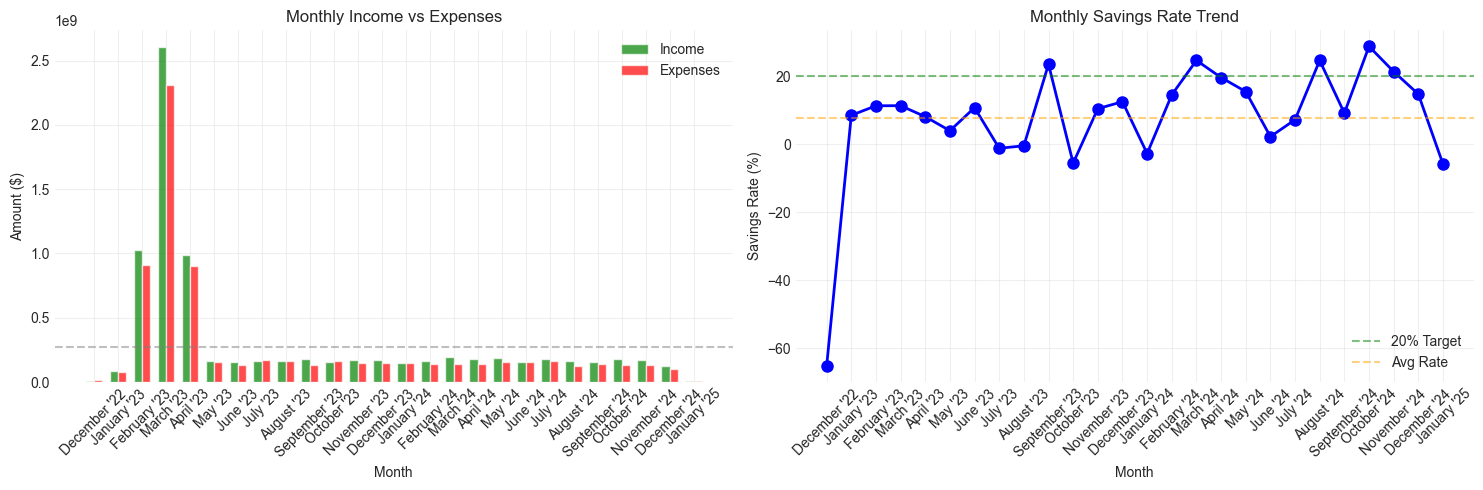

In [52]:
"""
Monthly Trends Analysis
----------------------------
Purpose: Understand how spending changes month by month
"""

# Create monthly summary
monthly_summary = df_clean.groupby(['year', 'month', 'month_name']).agg({
    'amount': lambda x: x[x > 0].sum(),  # Income
    'abs_amount': lambda x: x[df_clean.loc[x.index, 'amount'] < 0].sum()  # Expenses
}).reset_index()

monthly_summary.columns = ['year', 'month', 'month_name', 'income', 'expenses']
monthly_summary['savings'] = monthly_summary['income'] - monthly_summary['expenses']
monthly_summary['savings_rate'] = (monthly_summary['savings'] / monthly_summary['income']) * 100

# Sort chronologically
monthly_summary = monthly_summary.sort_values(['year', 'month'])

# Display monthly summary
print("MONTHLY FINANCIAL SUMMARY:")
print("=" * 80)
print(monthly_summary[['month_name', 'year', 'income', 'expenses', 'savings', 'savings_rate']].round(2).to_string(index=False))

# Visualization: Monthly income vs expenses
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
months = [f"{row['month_name']} '{str(row['year'])[-2:]}" for _, row in monthly_summary.iterrows()]
x = range(len(months))
width = 0.35

axes[0].bar([i - width/2 for i in x], monthly_summary['income'], width, label='Income', color='green', alpha=0.7)
axes[0].bar([i + width/2 for i in x], monthly_summary['expenses'], width, label='Expenses', color='red', alpha=0.7)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Amount ($)')
axes[0].set_title('Monthly Income vs Expenses')
axes[0].set_xticks(x)
axes[0].set_xticklabels(months, rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=monthly_summary['expenses'].mean(), color='gray', linestyle='--', alpha=0.5, label='Avg Expenses')

# Savings rate line chart
axes[1].plot(months, monthly_summary['savings_rate'], marker='o', linewidth=2, markersize=8, color='blue')
axes[1].axhline(y=20, color='green', linestyle='--', alpha=0.5, label='20% Target')
axes[1].axhline(y=monthly_summary['savings_rate'].mean(), color='orange', linestyle='--', alpha=0.5, label='Avg Rate')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Savings Rate (%)')
axes[1].set_title('Monthly Savings Rate Trend')
axes[1].set_xticks(x)
axes[1].set_xticklabels(months, rotation=45)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('monthly_trends.png', dpi=300, bbox_inches='tight')
plt.show()

EXPENSE BREAKDOWN BY CATEGORY:
       category        total  avg_per_transaction  transaction_count  percentage  cumulative_percentage
          Other 4.822902e+09            382436.14              12611   67.581871              67.581871
      Education 1.283164e+09            383721.37               3344   17.980593              85.562465
       Transfer 3.331899e+08            501037.39                665    4.668889              90.231353
       Shopping 3.169215e+08            379092.76                836    4.440926              94.672279
         Income 1.860124e+08            348337.81                534    2.606535              97.278815
Cash Withdrawal 1.034690e+08            360519.22                287    1.449880              98.728695
     Dining Out 9.072522e+07            364358.32                249    1.271305             100.000000

 80/20 RULE: 1 categories account for 67.6% of spending


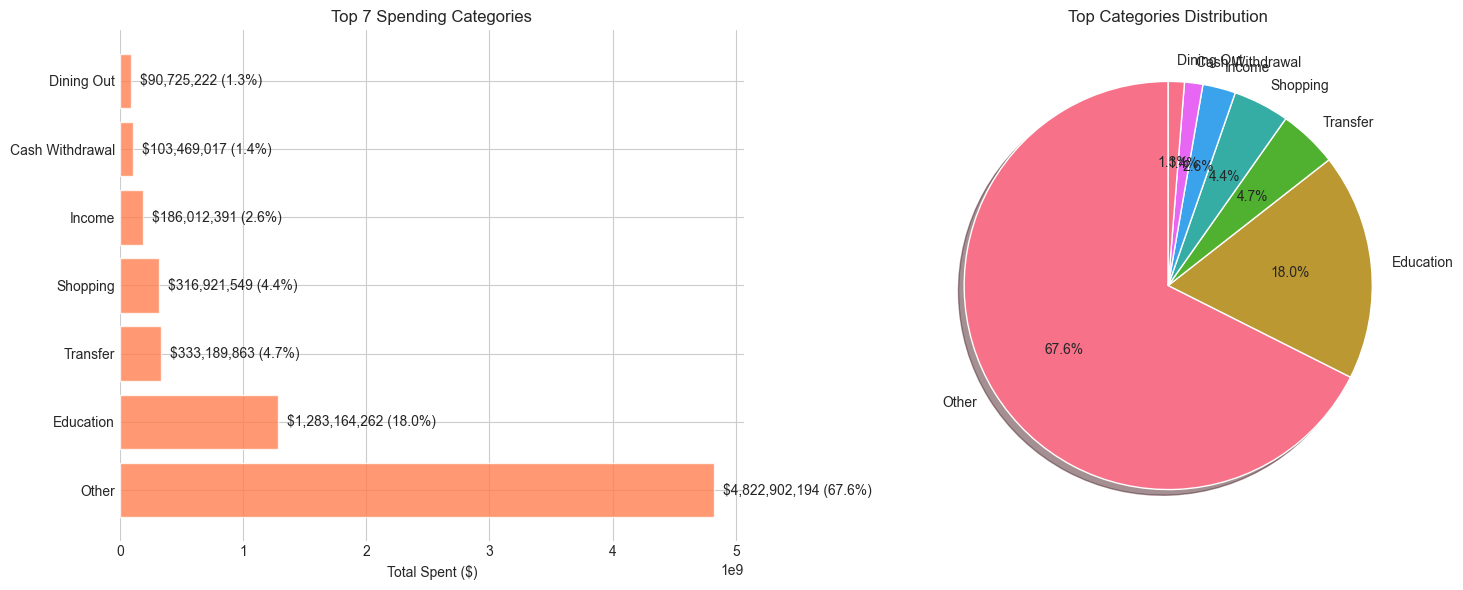

In [53]:
"""
Expense Categories Analysis
--------------------------------
Purpose: Identify where money is going by category
"""

# Filter expenses only
expenses = df_clean[df_clean['transaction_type'] == 'Expense']

if len(expenses) == 0:
    print(" No expense transactions found!")
else:
    # Group by category
    category_spending = expenses.groupby('category').agg({
        'abs_amount': ['sum', 'mean', 'count']
    }).round(2)

    category_spending.columns = ['total', 'avg_per_transaction', 'transaction_count']
    category_spending = category_spending.sort_values('total', ascending=False).reset_index()

    # Calculate percentage of total expenses
    total_expenses_all = category_spending['total'].sum()
    category_spending['percentage'] = (category_spending['total'] / total_expenses_all) * 100
    category_spending['cumulative_percentage'] = category_spending['percentage'].cumsum()

    print("EXPENSE BREAKDOWN BY CATEGORY:")
    print("=" * 80)
    print(category_spending.to_string(index=False))

    # Identify top categories (80/20 rule)
    top_categories = category_spending[category_spending['cumulative_percentage'] <= 80]
    print(f"\n 80/20 RULE: {len(top_categories)} categories account for {top_categories['percentage'].sum():.1f}% of spending")

    # Visualization: Top spending categories
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Horizontal bar chart - Top categories
    top_n = min(8, len(category_spending))
    top_categories_plot = category_spending.head(top_n)
    y_pos = range(len(top_categories_plot))
    axes[0].barh(y_pos, top_categories_plot['total'], color='coral', alpha=0.8)
    axes[0].set_yticks(y_pos)
    axes[0].set_yticklabels(top_categories_plot['category'])
    axes[0].set_xlabel('Total Spent ($)')
    axes[0].set_title(f'Top {top_n} Spending Categories')
    for i, v in enumerate(top_categories_plot['total']):
        axes[0].text(v + total_expenses_all*0.01, i, f'${v:,.0f} ({top_categories_plot["percentage"].iloc[i]:.1f}%)', va='center')

    # Pie chart - Category distribution
    axes[1].pie(top_categories_plot['total'], labels=top_categories_plot['category'], 
                autopct='%1.1f%%', startangle=90, shadow=True)
    axes[1].set_title('Top Categories Distribution')

    plt.tight_layout()
    plt.savefig('category_breakdown.png', dpi=300, bbox_inches='tight')
    plt.show()

SPENDING BY DAY OF WEEK:
                    sum       mean  count     median
day_name                                            
Monday     9.707214e+08  382474.95   2538  317478.36
Tuesday    1.006396e+09  363582.36   2768  277401.06
Wednesday  1.058690e+09  369396.36   2866  293141.06
Thursday   1.022937e+09  389393.58   2627  338625.51
Friday     1.058627e+09  370408.26   2858  309954.49
Saturday   1.005320e+09  418534.62   2402  376851.46
Sunday     1.013693e+09  410901.18   2467  369938.15

 KEY INSIGHT: Weekend transactions are 10.7% larger than weekday transactions
    Weekday average: $374706.83
    Weekend average: $414666.95
    Weekend spending accounts for 28.3% of total expenses


C:\Users\mhuza\AppData\Local\Temp\ipykernel_6124\467634713.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(weekday_data, labels=day_order, patch_artist=True, showfliers=False)


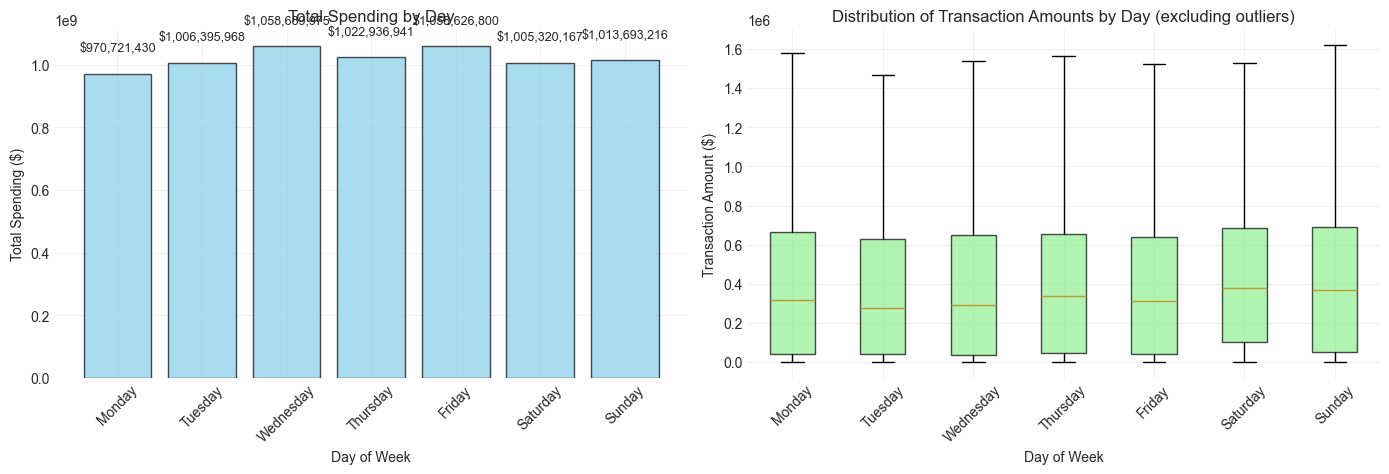

In [54]:
"""
Behavioral Analysis - When Do You Spend?
-----------------------------------------------
Purpose: Understand spending patterns by day of week
"""

expenses = df_clean[df_clean['transaction_type'] == 'Expense']

if len(expenses) > 0:
    # Spending by day of week
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_spending = expenses.groupby('day_name')['abs_amount'].agg(['sum', 'mean', 'count', 'median']).reindex(day_order)

    print("SPENDING BY DAY OF WEEK:")
    print("=" * 70)
    print(weekday_spending.round(2))

    # Weekend vs Weekday comparison
    weekend_spending = expenses[expenses['is_weekend'] == True]['abs_amount'].mean()
    weekday_spending_avg = expenses[expenses['is_weekend'] == False]['abs_amount'].mean()
    weekend_vs_weekday = (weekend_spending / weekday_spending_avg - 1) * 100 if weekday_spending_avg > 0 else 0

    print(f"\n KEY INSIGHT: Weekend transactions are {weekend_vs_weekday:.1f}% larger than weekday transactions")
    print(f"    Weekday average: ${weekday_spending_avg:.2f}")
    print(f"    Weekend average: ${weekend_spending:.2f}")

    # Calculate weekend spending percentage
    weekend_total = expenses[expenses['is_weekend'] == True]['abs_amount'].sum()
    total_expenses_all = expenses['abs_amount'].sum()
    weekend_pct = (weekend_total / total_expenses_all) * 100 if total_expenses_all > 0 else 0
    print(f"    Weekend spending accounts for {weekend_pct:.1f}% of total expenses")

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Bar chart - Total spending
    axes[0].bar(day_order, weekday_spending['sum'], color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Day of Week')
    axes[0].set_ylabel('Total Spending ($)')
    axes[0].set_title('Total Spending by Day')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)

    # Add value labels
    for i, v in enumerate(weekday_spending['sum']):
        axes[0].text(i, v + total_expenses_all*0.01, f'${v:,.0f}', ha='center', fontsize=9)

    # Box plot for distribution
    weekday_data = [expenses[expenses['day_name'] == day]['abs_amount'] for day in day_order]
    bp = axes[1].boxplot(weekday_data, labels=day_order, patch_artist=True, showfliers=False)
    for box in bp['boxes']:
        box.set(facecolor='lightgreen', alpha=0.7)
    axes[1].set_xlabel('Day of Week')
    axes[1].set_ylabel('Transaction Amount ($)')
    axes[1].set_title('Distribution of Transaction Amounts by Day (excluding outliers)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('weekday_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No expense data available for weekday analysis")

 SUSPICIOUS TRANSACTIONS ANALYSIS
Total suspicious transactions: 14203
Percentage of all transactions: 42.26%
Total value of suspicious: $8,389,466,643.88
Average suspicious amount: $590,682.72

 Suspicious transactions by category:
  Other: 8684 transactions ($5,141,890,550.57)
  Education: 4413 transactions ($2,605,988,703.93)
  Shopping: 1106 transactions ($641,587,389.38)

=TOP 5 SUSPICIOUS TRANSACTIONS:
  • 2024-08-01 00:00:00: CRYPTOEXCHANGEWAZIRX - $999,852.96 (Other)
  • 2023-02-17 00:00:00: NETTXN:TICKETBOOKINGAIRINDIA - $999,832.55 (Education)
  • 2023-08-12 00:00:00: NETTXN:TICKETBOOKINGYATRA - $999,800.08 (Education)
  • 2023-03-16 00:00:00: NETTXN:TICKETBOOKINGMAKEMYTRIP - $999,749.73 (Education)
  • 2023-03-01 00:00:00: NETTXN:AMAZON - $999,738.76 (Shopping)


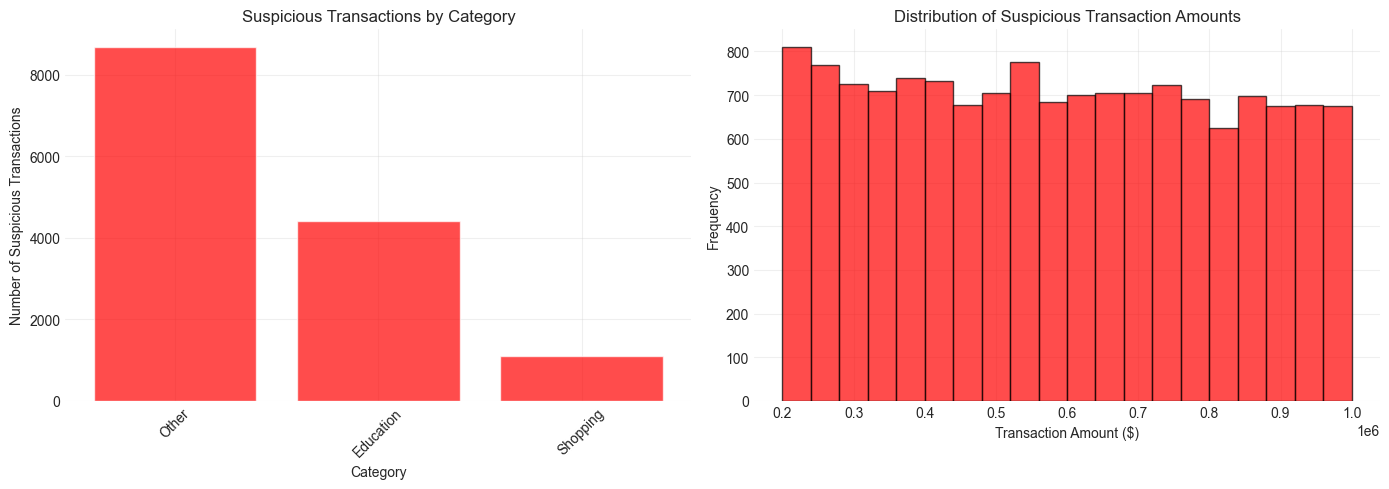

In [55]:
"""
Risk Analysis - Suspicious Transactions
---------------------------------------------
Purpose: Analyze flagged suspicious transactions
"""

if 'isSuspicious' in df_clean.columns:
    suspicious = df_clean[df_clean['isSuspicious'] == True]
    
    print(" SUSPICIOUS TRANSACTIONS ANALYSIS")
    print("=" * 70)
    print(f"Total suspicious transactions: {len(suspicious)}")
    print(f"Percentage of all transactions: {(len(suspicious)/len(df_clean))*100:.2f}%")
    
    if len(suspicious) > 0:
        print(f"Total value of suspicious: ${suspicious['abs_amount'].sum():,.2f}")
        print(f"Average suspicious amount: ${suspicious['abs_amount'].mean():,.2f}")
        
        print("\n Suspicious transactions by category:")
        suspicious_cats = suspicious['category'].value_counts()
        for cat, count in suspicious_cats.items():
            cat_total = suspicious[suspicious['category'] == cat]['abs_amount'].sum()
            print(f"  {cat}: {count} transactions (${cat_total:,.2f})")
        
        # Show top suspicious transactions
        print("\n=TOP 5 SUSPICIOUS TRANSACTIONS:")
        top_suspicious = suspicious.nlargest(5, 'abs_amount')[['date', 'description', 'abs_amount', 'category']]
        for idx, row in top_suspicious.iterrows():
            print(f"  • {row['date']}: {row['description']} - ${row['abs_amount']:,.2f} ({row['category']})")
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Suspicious by category
        cat_counts = suspicious['category'].value_counts().head(8)
        axes[0].bar(cat_counts.index, cat_counts.values, color='red', alpha=0.7)
        axes[0].set_xlabel('Category')
        axes[0].set_ylabel('Number of Suspicious Transactions')
        axes[0].set_title('Suspicious Transactions by Category')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(True, alpha=0.3)
        
        # Suspicious amount distribution
        axes[1].hist(suspicious['abs_amount'], bins=20, color='red', alpha=0.7, edgecolor='black')
        axes[1].set_xlabel('Transaction Amount ($)')
        axes[1].set_ylabel('Frequency')
        axes[1].set_title('Distribution of Suspicious Transaction Amounts')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('suspicious_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
    else:
        print(" No suspicious transactions found in the dataset!")
else:
    print("No 'isSuspicious' column found in dataset")
    
    # Alternative: Find potential anomalies based on statistical patterns
    print("\nAnalyzing potential anomalies based on transaction patterns...")
    
    expenses_only = df_clean[df_clean['transaction_type'] == 'Expense'].copy()
    
    if len(expenses_only) > 0:
        # Find unusually large transactions (above 3 standard deviations)
        mean_expense = expenses_only['abs_amount'].mean()
        std_expense = expenses_only['abs_amount'].std()
        threshold_3sigma = mean_expense + 3 * std_expense
        
        # Find unusually large transactions (above 99th percentile)
        threshold_99th = expenses_only['abs_amount'].quantile(0.99)
        
        anomalies_3sigma = expenses_only[expenses_only['abs_amount'] > threshold_3sigma]
        anomalies_99th = expenses_only[expenses_only['abs_amount'] > threshold_99th]
        
        print(f"Average expense: ${mean_expense:.2f}")
        print(f"Standard deviation: ${std_expense:.2f}")
        print(f"3-sigma threshold: ${threshold_3sigma:.2f}")
        print(f"99th percentile threshold: ${threshold_99th:.2f}")
        print(f"\nFound {len(anomalies_3sigma)} transactions above 3-sigma")
        print(f"Found {len(anomalies_99th)} transactions above 99th percentile")
        
        if len(anomalies_99th) > 0:
            print("\nPOTENTIAL ANOMALIES (Top 10 by amount):")
            top_anomalies = anomalies_99th.nlargest(10, 'abs_amount')[['date', 'description', 'abs_amount', 'category']]
            for idx, row in top_anomalies.iterrows():
                print(f"  • {row['date']}: {row['description']} - ${row['abs_amount']:,.2f} ({row['category']})")
    else:
        print("No expense transactions to analyze for anomalies")

ACCOUNT BALANCE TRENDS
Starting balance: $1,691,248.57
Ending balance: $944,550.84
Net change: $-746,697.73
 Balance decreased by $746,697.73 over the period


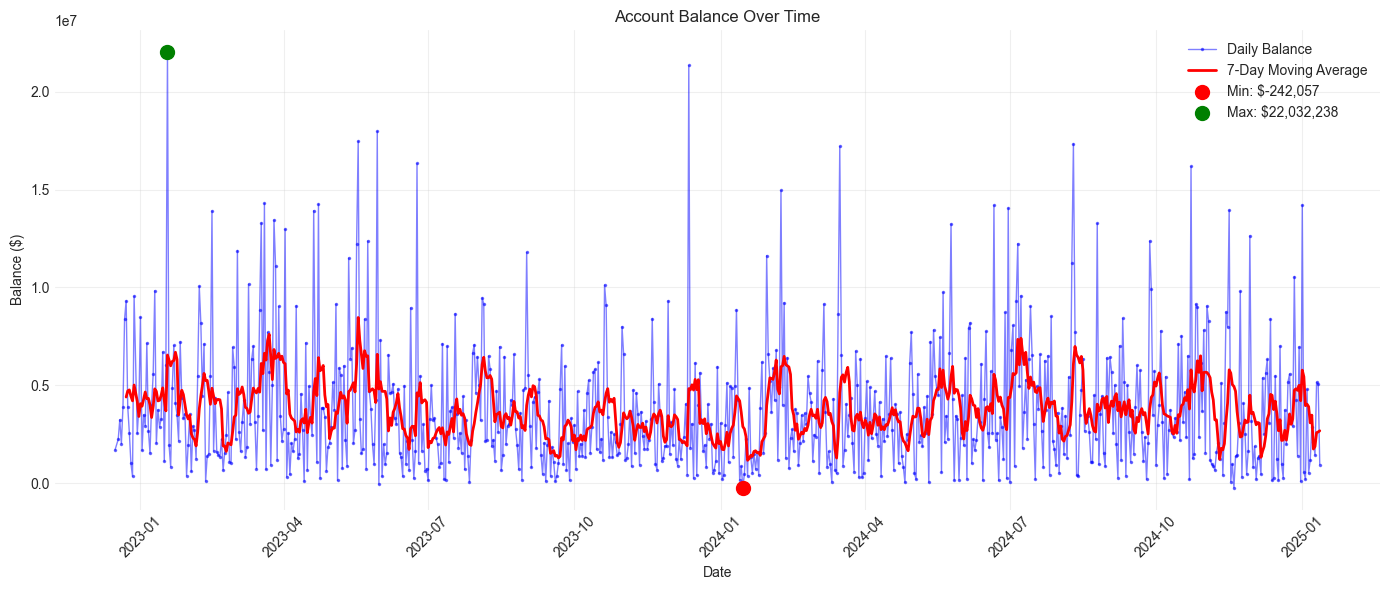


Account was negative on 3 days
          date    balance   balance_ma7
164 2023-05-31  -59522.72  4.805429e+06
393 2024-01-15 -242057.44  2.884251e+06
702 2024-11-19 -231268.28  4.939244e+06


In [56]:
"""
Account Balance Over Time
-------------------------------
Purpose: Track how your account balance evolves
"""

# Get daily balance (last transaction of each day)
daily_balance = df_clean.groupby(df_clean['date'].dt.date)['balance'].last().reset_index()
daily_balance.columns = ['date', 'balance']
daily_balance['date'] = pd.to_datetime(daily_balance['date'])

print("ACCOUNT BALANCE TRENDS")
print("=" * 70)
print(f"Starting balance: ${daily_balance['balance'].iloc[0]:,.2f}")
print(f"Ending balance: ${daily_balance['balance'].iloc[-1]:,.2f}")
balance_change = daily_balance['balance'].iloc[-1] - daily_balance['balance'].iloc[0]
print(f"Net change: ${balance_change:,.2f}")

if balance_change > 0:
    print(f"Balance increased by ${balance_change:,.2f} over the period")
else:
    print(f" Balance decreased by ${abs(balance_change):,.2f} over the period")

# Calculate running 7-day average for trend
daily_balance['balance_ma7'] = daily_balance['balance'].rolling(window=7).mean()

# Visualization
plt.figure(figsize=(14, 6))

plt.plot(daily_balance['date'], daily_balance['balance'], marker='.', linestyle='-', 
         linewidth=1, markersize=3, color='blue', alpha=0.5, label='Daily Balance')
plt.plot(daily_balance['date'], daily_balance['balance_ma7'], linewidth=2, 
         color='red', label='7-Day Moving Average')

# Add min/max markers
min_balance = daily_balance['balance'].min()
max_balance = daily_balance['balance'].max()
min_date = daily_balance.loc[daily_balance['balance'].idxmin(), 'date']
max_date = daily_balance.loc[daily_balance['balance'].idxmax(), 'date']

plt.scatter([min_date], [min_balance], color='red', s=100, zorder=5, label=f'Min: ${min_balance:,.0f}')
plt.scatter([max_date], [max_balance], color='green', s=100, zorder=5, label=f'Max: ${max_balance:,.0f}')

plt.xlabel('Date')
plt.ylabel('Balance ($)')
plt.title('Account Balance Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('balance_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate days with negative balance (if any)
negative_days = daily_balance[daily_balance['balance'] < 0]
if len(negative_days) > 0:
    print(f"\nAccount was negative on {len(negative_days)} days")
    print(negative_days.head().to_string())

C:\Users\mhuza\AppData\Local\Temp\ipykernel_6124\3674873124.py:216: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\mhuza\AppData\Local\Temp\ipykernel_6124\3674873124.py:217: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans Mono.
  plt.savefig('final_dashboard.png', dpi=300, bbox_inches='tight')
C:\Users\mhuza\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


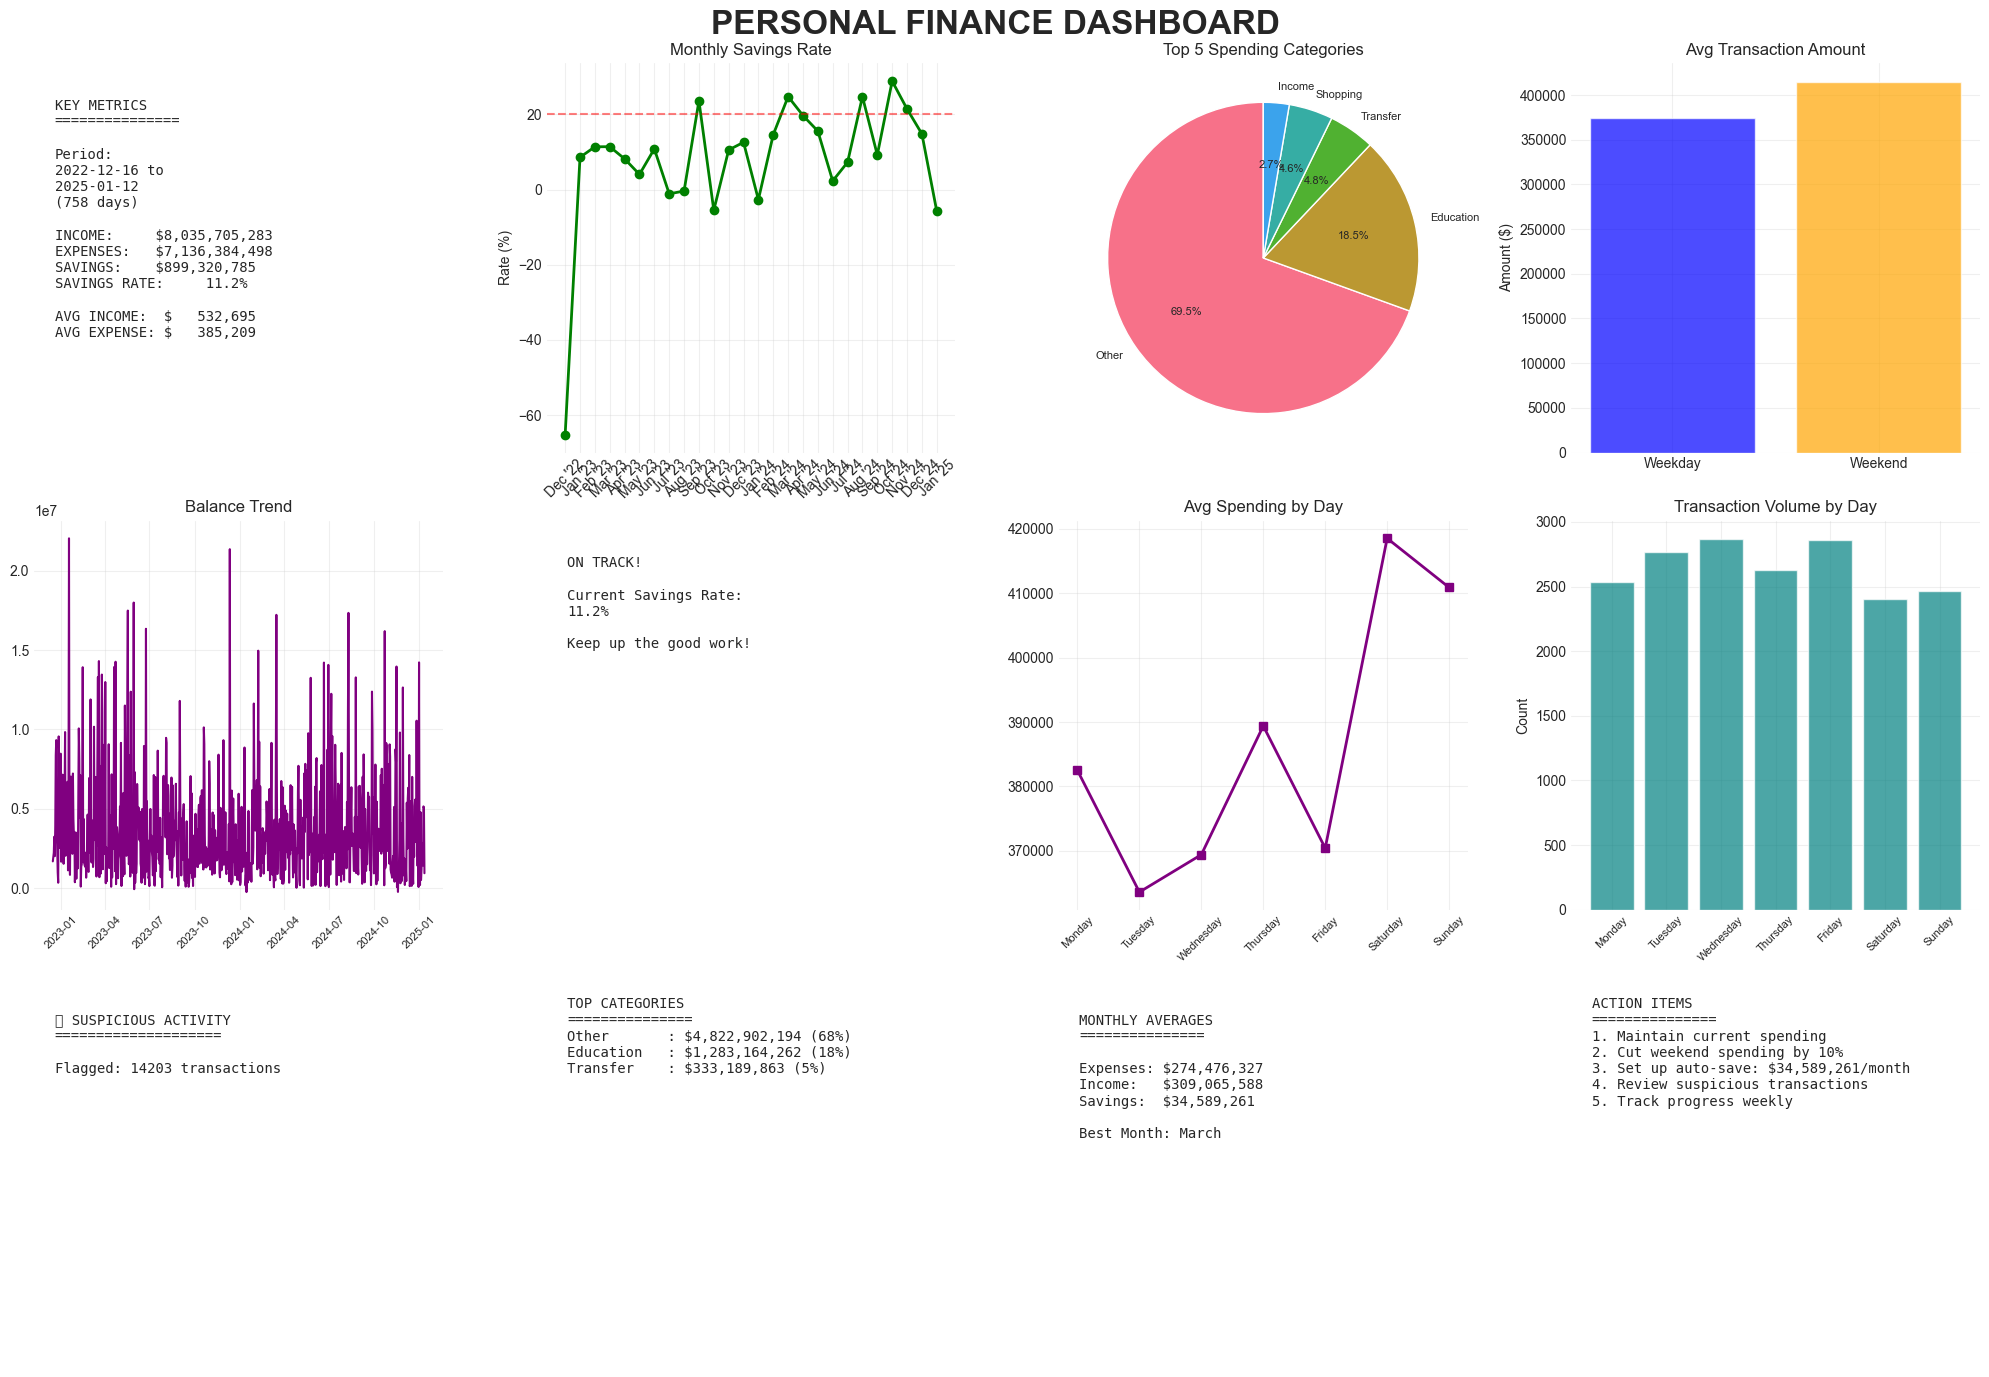


EXECUTIVE DASHBOARD COMPLETE! Check 'final_dashboard.png'


In [ ]:
"""
Create Executive Summary Dashboard
----------------------------------------
Purpose: Combine all insights into one comprehensive view
"""

# Create a multi-panel dashboard
fig = plt.figure(figsize=(20, 14))
fig.suptitle('PERSONAL FINANCE DASHBOARD', fontsize=24, fontweight='bold', y=0.98)

# 1. Key Metrics Panel
ax1 = plt.subplot(3, 4, 1)
ax1.axis('off')
metrics_text = f"""
KEY METRICS
{'='*15}

Period:
{df_clean['date'].min().date()} to 
{df_clean['date'].max().date()}
({(df_clean['date'].max() - df_clean['date'].min()).days} days)

INCOME:     ${total_income:>11,.0f}
EXPENSES:   ${total_expenses:>11,.0f}
SAVINGS:    ${net_savings:>11,.0f}
SAVINGS RATE: {savings_rate:>8.1f}%

AVG INCOME:  ${avg_income:>10,.0f}
AVG EXPENSE: ${avg_expense:>10,.0f}
"""
ax1.text(0.05, 0.95, metrics_text, fontsize=10, verticalalignment='top', fontfamily='monospace', transform=ax1.transAxes)

# 2. Savings Rate Trend
ax2 = plt.subplot(3, 4, 2)
if len(monthly_summary) > 0:
    months_short = [f"{m[:3]} '{str(y)[-2:]}" for m, y in zip(monthly_summary['month_name'], monthly_summary['year'])]
    ax2.plot(months_short, monthly_summary['savings_rate'], marker='o', linewidth=2, color='green')
    ax2.axhline(y=20, color='red', linestyle='--', alpha=0.5, label='Target')
    ax2.set_title('Monthly Savings Rate')
    ax2.set_ylabel('Rate (%)')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)
else:
    ax2.text(0.3, 0.5, 'Insufficient monthly data', ha='center')

# 3. Category Pie Chart
ax3 = plt.subplot(3, 4, 3)
if 'category_spending' in dir() and len(category_spending) > 0:
    top_categories = category_spending.head(5)
    ax3.pie(top_categories['total'], labels=top_categories['category'], 
            autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
    ax3.set_title('Top 5 Spending Categories')
else:
    ax3.text(0.3, 0.5, 'No expense data', ha='center')

# 4. Weekend vs Weekday
ax4 = plt.subplot(3, 4, 4)
if 'expenses' in dir() and len(expenses) > 0:
    weekday_avg = expenses[expenses['is_weekend'] == False]['abs_amount'].mean()
    weekend_avg = expenses[expenses['is_weekend'] == True]['abs_amount'].mean()
    ax4.bar(['Weekday', 'Weekend'], [weekday_avg, weekend_avg], 
            color=['blue', 'orange'], alpha=0.7)
    ax4.set_title('Avg Transaction Amount')
    ax4.set_ylabel('Amount ($)')
    ax4.grid(True, alpha=0.3)
else:
    ax4.text(0.3, 0.5, 'No expense data', ha='center')

# 5. Balance Trend Mini
ax5 = plt.subplot(3, 4, 5)
if len(daily_balance) > 0:
    ax5.plot(daily_balance['date'], daily_balance['balance'], linewidth=1.5, color='purple')
    ax5.set_title('Balance Trend')
    ax5.tick_params(axis='x', rotation=45, labelsize=8)
    ax5.grid(True, alpha=0.3)
else:
    ax5.text(0.3, 0.5, 'No balance data', ha='center')

# 6. Top Savings Opportunity
ax6 = plt.subplot(3, 4, 6)
ax6.axis('off')
if 'savings_df' in dir() and len(savings_df) > 0:
    top_saving = savings_df.iloc[0]
    saving_text = f"""
TOP SAVINGS OPPORTUNITY
{'='*25}

Category: {top_saving['category']}

Current:  ${top_saving['current_month']:,.0f}
Average:  ${top_saving['average_monthly']:,.0f}
Overspend: ${top_saving['overspend']:,.0f}

ANNUAL SAVINGS:
${top_saving['potential_annual_savings']:,.0f}
    """
else:
    saving_text = f"""
ON TRACK!

Current Savings Rate:
{savings_rate:.1f}%

Keep up the good work!
    """
ax6.text(0.05, 0.95, saving_text, fontsize=10, verticalalignment='top', fontfamily='monospace', transform=ax6.transAxes)

# 7. Daily Spending Pattern
ax7 = plt.subplot(3, 4, 7)
if 'expenses' in dir() and len(expenses) > 0:
    daily_avg = expenses.groupby('day_name')['abs_amount'].mean().reindex(day_order)
    ax7.plot(daily_avg.index, daily_avg.values, marker='s', linewidth=2, color='purple')
    ax7.set_title('Avg Spending by Day')
    ax7.tick_params(axis='x', rotation=45, labelsize=8)
    ax7.grid(True, alpha=0.3)
else:
    ax7.text(0.3, 0.5, 'No data', ha='center')

# 8. Transaction Volume
ax8 = plt.subplot(3, 4, 8)
if 'expenses' in dir() and len(expenses) > 0:
    daily_count = expenses.groupby('day_name').size().reindex(day_order)
    ax8.bar(daily_count.index, daily_count.values, color='teal', alpha=0.7)
    ax8.set_title('Transaction Volume by Day')
    ax8.tick_params(axis='x', rotation=45, labelsize=8)
    ax8.set_ylabel('Count')
    ax8.grid(True, alpha=0.3)
else:
    ax8.text(0.3, 0.5, 'No data', ha='center')

# 9. Suspicious Summary
ax9 = plt.subplot(3, 4, 9)
ax9.axis('off')
if 'isSuspicious' in df_clean.columns:
    susp_count = len(df_clean[df_clean['isSuspicious'] == True])
    susp_text = f"""
SUSPICIOUS ACTIVITY
{'='*20}

Flagged: {susp_count} transactions
{'(None)' if susp_count == 0 else ''}
    """
else:
    anomaly_count = len(anomalies_99th) if 'anomalies_99th' in locals() else 0
    susp_text = f"""
POTENTIAL ANOMALIES
{'='*20}

Found: {anomaly_count} transactions
above 99th percentile
    """
ax9.text(0.05, 0.95, susp_text, fontsize=10, verticalalignment='top', fontfamily='monospace', transform=ax9.transAxes)

# 10. Top Categories Table
ax10 = plt.subplot(3, 4, 10)
ax10.axis('off')
if 'category_spending' in dir() and len(category_spending) > 0:
    top_3_cats = category_spending.head(3)
    cat_table = "TOP CATEGORIES\n" + "="*15 + "\n"
    for _, row in top_3_cats.iterrows():
        cat_table += f"{row['category']:12s}: ${row['total']:>8,.0f} ({row['percentage']:.0f}%)\n"
else:
    cat_table = "TOP CATEGORIES\n" + "="*15 + "\nNo data available"
ax10.text(0.05, 0.95, cat_table, fontsize=10, verticalalignment='top', fontfamily='monospace', transform=ax10.transAxes)

# 11. Monthly Average (FIXED)
ax11 = plt.subplot(3, 4, 11)
ax11.axis('off')

# Calculate monthly averages safely
if 'monthly_summary' in dir() and len(monthly_summary) > 0:
    monthly_avg_expense = monthly_summary['expenses'].mean() if 'expenses' in monthly_summary.columns else 0
    monthly_avg_income = monthly_summary['income'].mean() if 'income' in monthly_summary.columns else 0
    monthly_avg_savings = monthly_summary['savings'].mean() if 'savings' in monthly_summary.columns else 0
    
    # Find best month (highest savings)
    if 'savings' in monthly_summary.columns and len(monthly_summary) > 0:
        best_month_idx = monthly_summary['savings'].idxmax()
        best_month = monthly_summary.loc[best_month_idx, 'month_name'] if 'month_name' in monthly_summary.columns else 'N/A'
    else:
        best_month = 'N/A'
else:
    monthly_avg_expense = monthly_avg_income = monthly_avg_savings = 0
    best_month = 'N/A'

monthly_text = f"""
MONTHLY AVERAGES
{'='*15}

Expenses: ${monthly_avg_expense:,.0f}
Income:   ${monthly_avg_income:,.0f}
Savings:  ${monthly_avg_savings:,.0f}

Best Month: {best_month}
"""
ax11.text(0.05, 0.95, monthly_text, fontsize=10, verticalalignment='top', fontfamily='monospace', transform=ax11.transAxes)

# 12. Action Items
ax12 = plt.subplot(3, 4, 12)
ax12.axis('off')

# Build action items dynamically
action_items = []
action_items.append("1. " + (f"Reduce {savings_df.iloc[0]['category']} spending" if 'savings_df' in dir() and len(savings_df) > 0 else "Maintain current spending"))

if 'weekend_vs_weekday' in dir():
    action_items.append("2. " + (f"Cut weekend spending by 10%" if weekend_vs_weekday > 0 else "Continue balanced spending"))

action_items.append(f"3. Set up auto-save: ${net_savings/len(monthly_summary) if len(monthly_summary) > 0 else 0:,.0f}/month")
action_items.append("4. Review " + ('suspicious' if 'isSuspicious' in df_clean.columns else 'large') + " transactions")
action_items.append("5. Track progress weekly")

action_text = "ACTION ITEMS\n" + "="*15 + "\n" + "\n".join(action_items)
ax12.text(0.05, 0.95, action_text, fontsize=10, verticalalignment='top', fontfamily='monospace', transform=ax12.transAxes)

plt.tight_layout()
plt.savefig('final_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nEXECUTIVE DASHBOARD COMPLETE! Check 'final_dashboard.png'")